In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IDS-506/Vanderbilt University Case

/content/drive/MyDrive/IDS-506/Vanderbilt University Case


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls

'Vanderbilt Univ Case Dataset.xlsx'   Vanderbilt_v4.ipynb
 Vanderbilt_v2.ipynb		     'Vanderbilt_v5_02 21.ipynb'


In [ ]:
df = pd.read_excel('Vanderbilt Univ Case Dataset.xlsx')

In [ ]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [ ]:
df.shape

(241, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SurgDate  241 non-null    datetime64[ns]
 1   DOW       241 non-null    object        
 2   T - 28    241 non-null    int64         
 3   T - 21    241 non-null    int64         
 4   T - 14    241 non-null    int64         
 5   T - 13    241 non-null    int64         
 6   T - 12    241 non-null    int64         
 7   T - 11    241 non-null    int64         
 8   T - 10    241 non-null    int64         
 9   T - 9     241 non-null    int64         
 10  T - 8     241 non-null    int64         
 11  T - 7     241 non-null    int64         
 12  T - 6     241 non-null    int64         
 13  T - 5     241 non-null    int64         
 14  T - 4     241 non-null    int64         
 15  T - 3     241 non-null    int64         
 16  T - 2     241 non-null    int64         
 17  T - 1     241 no

## Exploratory Data Analysis

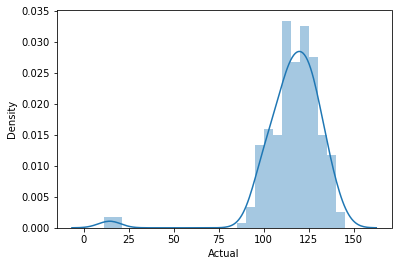

In [ ]:
sns.distplot(df['Actual'])

In [ ]:
df.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [ ]:
# Average of actual surgery is 116 with standard deviation of 17.63

In [ ]:
df_v1=df.drop(index = df[df['Actual']<25].index)

In [ ]:
df_v1.shape

(237, 19)

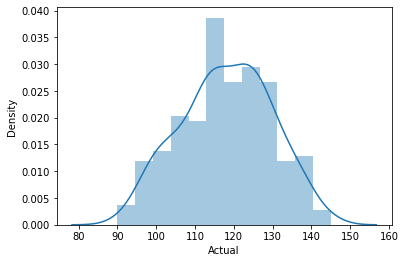

In [ ]:
sns.distplot(df_v1['Actual'])

In [ ]:
df_v1.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,34.835443,48.033755,65.518987,68.953586,71.683544,73.578059,76.198312,79.345992,83.713080,87.434599,90.759494,93.628692,96.270042,98.995781,102.831224,111.759494,118.105485
std,8.347481,9.606171,10.712571,11.268392,11.853138,11.785837,11.699573,11.292271,11.514635,11.776923,12.511908,12.798855,12.609641,12.464015,12.050257,11.658141,11.671050
min,10.000000,21.000000,41.000000,41.000000,41.000000,41.000000,40.000000,49.000000,54.000000,57.000000,57.000000,57.000000,62.000000,63.000000,70.000000,82.000000,90.000000
25%,29.000000,41.000000,59.000000,62.000000,64.000000,66.000000,68.000000,72.000000,76.000000,80.000000,83.000000,85.000000,88.000000,92.000000,95.000000,102.000000,111.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,104.000000,112.000000,118.000000
75%,41.000000,55.000000,73.000000,77.000000,80.000000,82.000000,84.000000,86.000000,92.000000,96.000000,99.000000,103.000000,106.000000,107.000000,111.000000,120.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [ ]:
# Average of actual surgery is 118 with standard deviation of 11.67
#earlier
# Average of actual surgery is 116 with standard deviation of 17.63

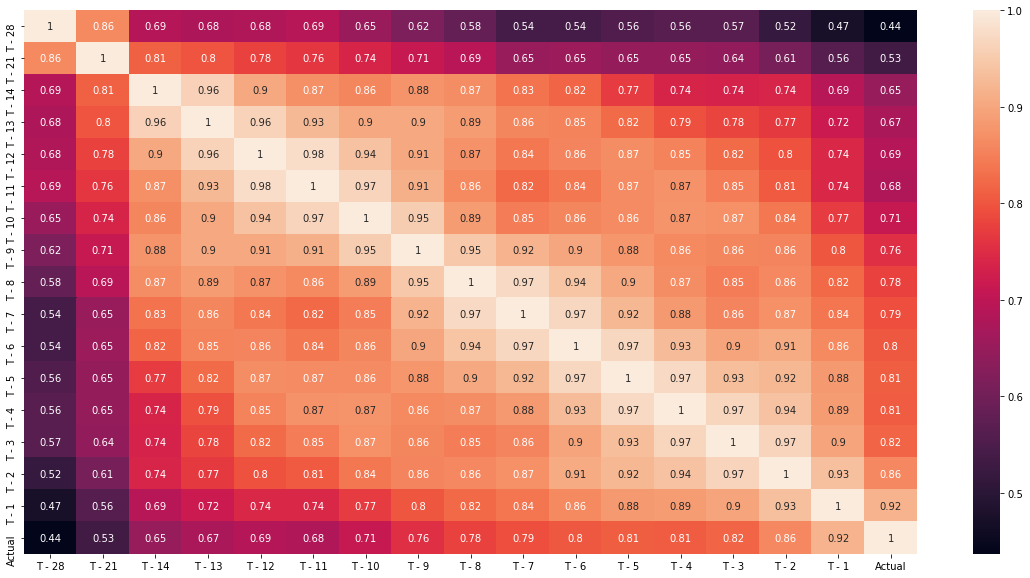

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_v1.corr(),annot= True, ax=ax)

In [ ]:
# Corr(T-1,Actual)=0.964, new=0.92
# Corr(T-3,Actual)=0.913, new=0.82
# Corr(T-7,Actual)=0.896, new=0.79
# Corr(T-14,Actual)=0.801, new=0.65
# Corr(T-21,Actual)=0.702, new=0.53
# Corr(T-28,Actual)=0.608, new=0.44

# Average number of surgery cases increases  as we move closer to actual day
# As the gap from surgery day increase, the correlation decreases
# From the correlation matrix, almost all the correlations are significantly high.

In [ ]:
df.groupby('DOW')['Actual'].mean(), df.groupby('DOW')['Actual'].std()

(DOW
 Fri    105.612245
 Mon    116.255319
 Thu    124.083333
 Tue    119.081633
 Wed    117.041667
 Name: Actual, dtype: float64, DOW
 Fri    26.357175
 Mon    18.456138
 Thu    10.379672
 Tue    10.864385
 Wed    11.240047
 Name: Actual, dtype: float64)

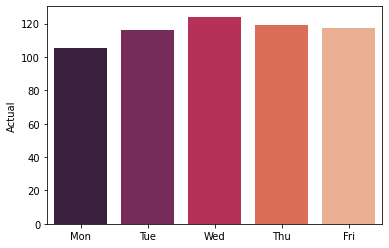

In [ ]:
x1=df['DOW'].unique()
sns.barplot(x=x1, y=df.groupby('DOW')['Actual'].mean(), palette="rocket")

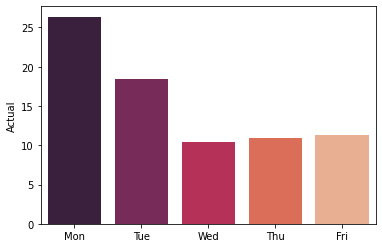

In [ ]:
x1=df['DOW'].unique()
sns.barplot(x=x1, y=df.groupby('DOW')['Actual'].std(), palette="rocket")

In [ ]:
df_v1.groupby('DOW')['Actual'].mean(), df.groupby('DOW')['Actual'].std()

(DOW
 Fri    111.608696
 Mon    118.434783
 Thu    124.083333
 Tue    119.081633
 Wed    117.041667
 Name: Actual, dtype: float64, DOW
 Fri    26.357175
 Mon    18.456138
 Thu    10.379672
 Tue    10.864385
 Wed    11.240047
 Name: Actual, dtype: float64)

In [ ]:
# Validating for T - 1
df.groupby('DOW')['T - 1'].mean(), df.groupby('DOW')['T - 1'].std()

(DOW
 Fri     97.428571
 Mon    110.787234
 Thu    117.583333
 Tue    114.020408
 Wed    110.416667
 Name: T - 1, dtype: float64, DOW
 Fri    25.922159
 Mon    18.863279
 Thu    10.394011
 Tue    10.296621
 Wed    11.100764
 Name: T - 1, dtype: float64)

In [ ]:
# Validating for T - 1
df_v1.groupby('DOW')['T - 1'].mean(), df.groupby('DOW')['T - 1'].std()

(DOW
 Fri    103.304348
 Mon    113.130435
 Thu    117.583333
 Tue    114.020408
 Wed    110.416667
 Name: T - 1, dtype: float64, DOW
 Fri    25.922159
 Mon    18.863279
 Thu    10.394011
 Tue    10.296621
 Wed    11.100764
 Name: T - 1, dtype: float64)

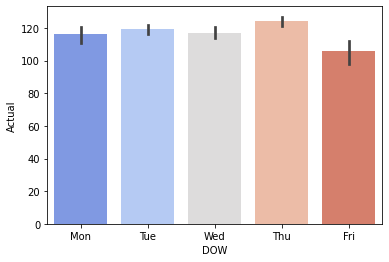

In [ ]:
# Trend of Number of Surgeries performed by Day of Week
df2 = df[['DOW', 'Actual']]
ax = sns.barplot(x='DOW',y='Actual', data=df, palette='coolwarm')

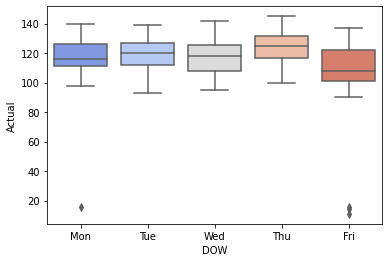

In [ ]:
sns.boxplot(x='DOW',y='Actual', data=df, palette='coolwarm')

In [ ]:
# Fridays have lowest number of surgeries which may be indicate surgeon preferences
# Thursdays have lowest number of surgeries
# Alternatively, the high number of surgeries on Thursday might be due to add-on cases

In [ ]:
test=df.loc[0:240, 'T - 28':'T - 1']
test.shape

(241, 16)

In [ ]:
mean = test.mean()
maximum = test.max()
std = test.std()

In [ ]:
a = pd.DataFrame(mean)
b = pd.DataFrame(maximum)
c = pd.DataFrame(std)
new = pd.concat([a,b,c], axis = 1)
new.columns = ['Mean', 'Maximum', 'Standard Deviation']
new

,Mean,Maximum,Standard Deviation
T - 28,34.261411,57,9.387610
T - 21,47.240664,73,11.321079
T - 14,64.439834,93,13.495891
T - 13,67.817427,99,14.200934
T - 12,70.502075,102,14.873109
T - 11,72.365145,106,14.970786
T - 10,74.946058,106,15.096674
T - 9,78.041494,112,15.054842
T - 8,82.336100,113,15.594841
T - 7,86.000000,118,16.089075


In [ ]:
test=df_v1.loc[0:240, 'T - 28':'T - 1']
test.shape

(237, 16)

In [ ]:
mean = test.mean()
maximum = test.max()
std = test.std()

In [ ]:
a = pd.DataFrame(mean)
b = pd.DataFrame(maximum)
c = pd.DataFrame(std)
new = pd.concat([a,b,c], axis = 1)
new.columns = ['Mean', 'Maximum', 'Standard Deviation']
new

,Mean,Maximum,Standard Deviation
T - 28,34.835443,57,8.347481
T - 21,48.033755,73,9.606171
T - 14,65.518987,93,10.712571
T - 13,68.953586,99,11.268392
T - 12,71.683544,102,11.853138
T - 11,73.578059,106,11.785837
T - 10,76.198312,106,11.699573
T - 9,79.345992,112,11.292271
T - 8,83.713080,113,11.514635
T - 7,87.434599,118,11.776923


In [ ]:
df_v1[df_v1['SurgDate']=='8/27/2012']

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
227,2012-08-27,Mon,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127


In [ ]:
df_train = df_v1.loc[0:226]
df_train.drop(['SurgDate','DOW'], axis=1, inplace=True)

In [ ]:
df_train

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,41,51,74,78,81,84,84,85,85,86,91,90,96,108,112,116,113
223,29,39,73,75,77,83,83,83,88,93,97,105,109,110,112,123,132
224,30,38,78,80,86,87,87,90,95,98,102,106,106,106,112,127,137
225,41,48,89,98,98,98,100,110,113,117,112,112,113,114,119,129,127


In [ ]:
df_test = df_v1.loc[227:]
df_test.drop(['SurgDate','DOW'], axis=1, inplace=True)

In [ ]:
df_test

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
227,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127
228,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139,139
229,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114,125
230,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124,126
231,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116,124
232,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116,114
233,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95,103
234,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119,126
235,10,21,48,48,48,50,56,60,65,68,68,68,68,67,82,91,103
236,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118


In [ ]:
X_train = df_train.drop('Actual', axis=1)
y_train = df_train['Actual']

X_test = df_test.drop('Actual', axis=1)
y_test = df_test['Actual']

In [ ]:
X_train

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1
0,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104
1,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114
2,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114
3,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103
4,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,41,51,74,78,81,84,84,85,85,86,91,90,96,108,112,116
223,29,39,73,75,77,83,83,83,88,93,97,105,109,110,112,123
224,30,38,78,80,86,87,87,90,95,98,102,106,106,106,112,127
225,41,48,89,98,98,98,100,110,113,117,112,112,113,114,119,129


In [ ]:
X_test

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1
227,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123
228,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139
229,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114
230,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124
231,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116
232,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116
233,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95
234,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119
235,10,21,48,48,48,50,56,60,65,68,68,68,68,67,82,91
236,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110


In [ ]:
y_train

0      106
1      121
2      126
3      114
4      106
      ... 
222    113
223    132
224    137
225    127
226    126
Name: Actual, Length: 223, dtype: int64

In [ ]:
y_test

227    127
228    139
229    125
230    126
231    124
232    114
233    103
234    126
235    103
236    118
237    108
238    121
239    114
240    102
Name: Actual, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

13.84021303436468


In [ ]:
lm.coef_

array([-0.05468727,  0.09375972, -0.10703914,  0.10856215,  0.07139575,
       -0.21455475,  0.02373923,  0.13667367, -0.01201465,  0.13152796,
       -0.13635564, -0.05095665,  0.10903604, -0.14289619,  0.08125206,
        0.90544553])

In [ ]:
cdf = pd.DataFrame(lm.coef_,X_train.columns, columns=['Coeffecients'])

In [ ]:
cdf

,Coeffecients
T - 28,-0.054687
T - 21,0.093760
T - 14,-0.107039
T - 13,0.108562
T - 12,0.071396
T - 11,-0.214555
T - 10,0.023739
T - 9,0.136674
T - 8,-0.012015
T - 7,0.131528


In [ ]:
predictions = lm.predict(X_test)

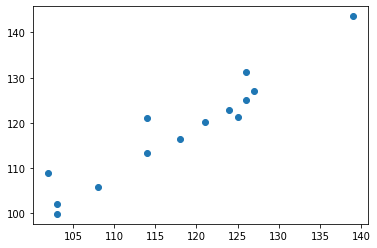

In [ ]:
plt.scatter(y_test,predictions)

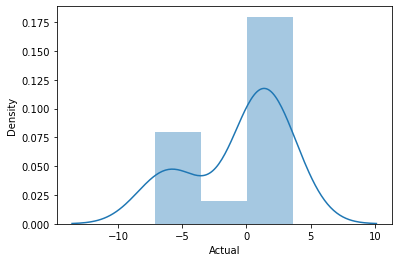

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.779361985282982
MSE: 12.921687554798805
RMSE: 3.5946748886093727


In [ ]:
#cdf = pd.DataFrame(lm.coef_,X_train.columns, columns=['Coeffecients'])
Actual_vs_Predicted = pd.DataFrame(predictions,df_test['Actual'], columns=['Predicted'])
Actual_vs_Predicted

,Predicted
Actual,
127,126.956816
139,143.583196
125,121.373066
126,131.223166
124,122.886070
114,121.098577
103,102.022499
126,124.997061
103,99.888807


In [ ]:
df_v1[df_v1['SurgDate']=='8/27/2012']

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
227,2012-08-27,Mon,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127


In [ ]:
pred_1 = df_v1[226:][['SurgDate','Actual']]

In [ ]:
pred_1

,SurgDate,Actual
230,2012-08-30,126
231,2012-08-31,124
232,2012-09-04,114
233,2012-09-05,103
234,2012-09-06,126
235,2012-09-07,103
236,2012-09-10,118
237,2012-09-11,108
238,2012-09-12,121
239,2012-09-13,114


In [ ]:
predictions

array([126.95681597, 143.58319612, 121.37306579, 131.22316578,
       122.88607024, 121.09857747, 102.02249923, 124.99706081,
        99.88880682, 116.36317522, 105.74671445, 120.22697251,
       113.42498298, 108.89229244])

## ANOVA Testing

In [ ]:
# Null Hypothesis: Total surgical case volume does not differ based on the day of week
# Alternative Hypothesis: Total surgical case volume differs based on the day of week

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Actual ~ DOW', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
DOW,8909.054042,4.0,8.002734,0.000005
Residual,65681.825626,236.0,NaN,NaN


In [ ]:
# The p value obtained from ANOVA analysis is significant (p < 0.05)
# Therefore, we can conclude that there are significant differences among treatments 
# We reject the null hypothesis and accept alternative hypothesis that total surgical case volume differ by DOW

In [ ]:
# Perform multiple pairwise comparison (Tukey HSD)
# Tukey test results will provide the difference between combination of any two days

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Actual'], groups=df['DOW'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Fri    Mon  10.6431  0.017   1.2796 20.0065   True
   Fri    Thu  18.4711  0.001   9.1576 27.7846   True
   Fri    Tue  13.4694  0.001    4.204 22.7348   True
   Fri    Wed  11.4294 0.0077   2.1159  20.743   True
   Mon    Thu    7.828 0.1529  -1.5831 17.2391  False
   Mon    Tue   2.8263    0.9  -6.5371 12.1898  False
   Mon    Wed   0.7863    0.9  -8.6247 10.1974  False
   Thu    Tue  -5.0017 0.5685 -14.3152  4.3118  False
   Thu    Wed  -7.0417 0.2375 -16.4031  2.3197  False
   Tue    Wed    -2.04    0.9 -11.3535  7.2736  False
-----------------------------------------------------


# Approaches:

Model 1: Linear Regression <br>
Model 2: Time Series (Simple Moving Average)

Dependent variable: Actual Surgery <br>
Independent variables: T - 28 to T - 4 <br><br>
We will not consider last 3 days for our model building: 
1. Business: Stakeholders would want to know scheduled surgery atleast a few days before actual date
2. Technical: Highest correlation with the actual surgery variable (from previous corr EDA)

## Linear Regression

Data Cleaning: Removed outliers to make the dependent variable uniformly distributed

Regression Equation:

x = a1*T-28 + a2*T-21 + ..... + ax*T-1 + ax*DOW

In [ ]:
df1 = df_v1.drop(columns = ['SurgDate', 'DOW'])

In [ ]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

### Baseline model

In [ ]:
# x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 
#          'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1']]
# y = df1[['Actual']]

In [ ]:
x = df1[['T - 3', 'T - 2', 'T - 1']]
y = df1[['Actual']]

In [ ]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative 

Intercept: 
 [15.00220627]
Coefficients: 
 [[-0.13743241  0.15288029  0.90361576]]


In [ ]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.682e+04
Date:                Sat, 20 Feb 2021   Prob (F-statistic):                        0.00
Time:                        20:18:45   Log-Likelihood:                         -710.01
No. Observations:                 237   AIC:                                      1426.
Df Residuals:                     234   BIC:                                      1436.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 3':'T - 1']
y_pred_test_data=regressorObject.predict(predict)

In [ ]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [ ]:
result = pd.concat([df, Predicted], ignore_index=True, axis=1)
result.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result['Predicted'] = round(result['Predicted'])

In [ ]:
final = result.dropna()
final.tail(10)

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual,Predicted
225,2012-08-23,Thu,41,48,89,98,98,98,100,110,113,117,112,112,113,114,119,129,127,122.0
226,2012-08-24,Fri,29,34,67,67,67,67,75,91,95,104,104,104,108,115,119,126,126,121.0
227,2012-08-27,Mon,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127,103.0
228,2012-08-28,Tue,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139,139,124.0
229,2012-08-29,Wed,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114,125,101.0
230,2012-08-30,Thu,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124,126,117.0
231,2012-08-31,Fri,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116,124,106.0
232,2012-09-04,Tue,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116,114,121.0
233,2012-09-05,Wed,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95,103,113.0
234,2012-09-06,Thu,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119,126,108.0


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = final['Actual']
y_predicted = final['Predicted']
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

20.436617116072224

In [ ]:
y = final['Actual']
yhat = final['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 14.719148936170212
MSE: 417.65531914893614
RMSE: 20.436617116072224
R-Squared: -0.3245360422877308


### Predicting results for 3 days before the Surgery Date

In [ ]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4']]
y = df1[['Actual']]

In [ ]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative 

Intercept: 
 [40.42147371]
Coefficients: 
 [[-0.0640146   0.05590182  0.12707909 -0.06299405  0.24426308 -0.71805695
   0.09246963  0.26304515  0.13928967  0.18765895 -0.31579327  0.22184926
   0.62816948]]


In [ ]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3829.
Date:                Sat, 20 Feb 2021   Prob (F-statistic):                   6.41e-255
Time:                        20:18:45   Log-Likelihood:                         -827.42
No. Observations:                 237   AIC:                                      1681.
Df Residuals:                     224   BIC:                                      1726.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 28':'T - 4']
y_pred_test_data=regressorObject.predict(predict)

In [ ]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [ ]:
result2 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result2.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result2['Predicted'] = round(result2['Predicted'])

In [ ]:
final2 = result2.dropna()

In [ ]:
round(result['Actual'].mean()), round(result2['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = final2['Actual']
y_predicted = final2['Predicted']
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

19.41955583776751

In [ ]:
y = final2['Actual']
yhat = final2['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.987234042553192
MSE: 377.11914893617023
RMSE: 19.41955583776751
R-Squared: -0.19598118855684277


### Predicting results for 7 days before the surgery date

In [ ]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8']]
y = df1[['Actual']]

In [ ]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 28':'T - 8']
y_pred_test_data=regressorObject.predict(predict)

In [ ]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [ ]:
result3 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result3.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result3['Predicted'] = round(result3['Predicted'])

In [ ]:
final3 = result3.dropna()

In [ ]:
round(result['Actual'].mean()), round(final3['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [ ]:
y = final3['Actual']
yhat = final3['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.565957446808511
MSE: 375.6085106382979
RMSE: 19.380622039508893
R-Squared: -0.19119040826349143


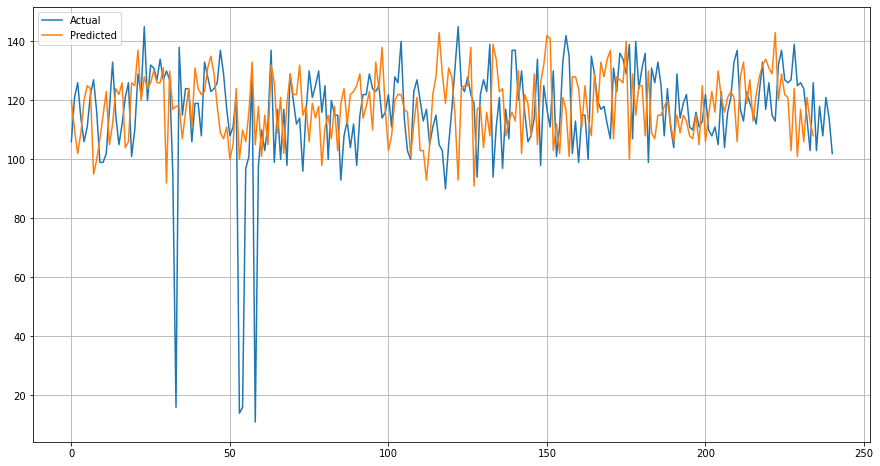

In [ ]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(result['Actual'],label='Actual')
plt.plot(result['Predicted'],label='Predicted')
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)